In [11]:
import pandas as pd #used to work on structured data
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load data (make sure file is in same folder as notebook)
data = pd.read_excel("titanic.xlsx")
data.head()


,Survived,Passanger_class,Sex,Age,Sibiling/Spouse,Parent/child,Family,Fare,Embarked
0,0,3,0,22,1,0,2,7.25,0
1,1,1,1,38,1,0,2,71.28,1
2,1,3,1,26,0,0,1,7.92,0
3,1,1,1,35,1,0,2,53.10,0
4,0,3,0,35,0,0,1,8.05,0


In [12]:
data.info()
data.isnull().sum()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Survived         891 non-null    int64  
 1   Passanger_class  891 non-null    int64  
 2   Sex              891 non-null    int64  
 3   Age              891 non-null    int64  
 4   Sibiling/Spouse  891 non-null    int64  
 5   Parent/child     891 non-null    int64  
 6   Family           891 non-null    int64  
 7   Fare             891 non-null    float64
 8   Embarked         891 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 62.8 KB


,Survived,Passanger_class,Sex,Age,Sibiling/Spouse,Parent/child,Family,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,29.356902,0.523008,0.381594,1.904602,32.204209,0.361392
std,0.486592,0.836071,0.477990,13.017814,1.102743,0.806057,1.613459,49.693593,0.635673
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,1.000000,7.910000,0.000000
50%,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,1.000000,14.450000,0.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,2.000000,31.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,11.000000,512.330000,2.000000


In [13]:
# Target
y = data['Survived']

# Features: keep columns you cleaned (example)
X = data.drop('Survived', axis=1)

# (Optional) show first rows
X.head()


,Passanger_class,Sex,Age,Sibiling/Spouse,Parent/child,Family,Fare,Embarked
0,3,0,22,1,0,2,7.25,0
1,1,1,38,1,0,2,71.28,1
2,3,1,26,0,0,1,7.92,0
3,1,1,35,1,0,2,53.10,0
4,3,0,35,0,0,1,8.05,0


In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

In [16]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [17]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8044692737430168

Confusion Matrix:
 [[98 12]
 [23 46]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.89      0.85       110
           1       0.79      0.67      0.72        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



In [18]:
feat_imp = pd.DataFrame({
    'feature': X.columns,
    'coefficient': model.coef_[0]
}).sort_values(by='coefficient', ascending=False)

feat_imp


,feature,coefficient
1,Sex,2.557390
7,Embarked,0.354175
4,Parent/child,0.034323
6,Fare,0.002283
2,Age,-0.038651
5,Family,-0.104760
3,Sibiling/Spouse,-0.141396
0,Passanger_class,-1.098769


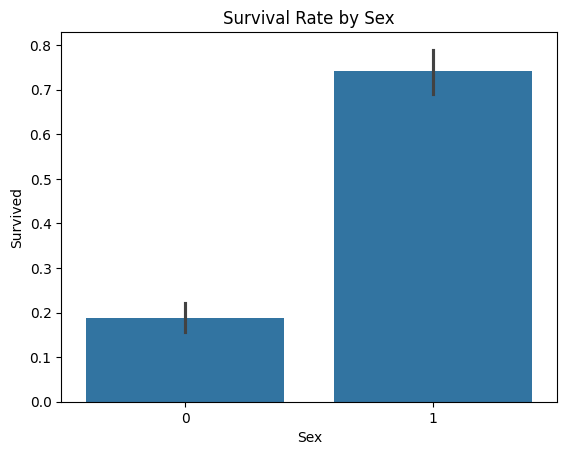

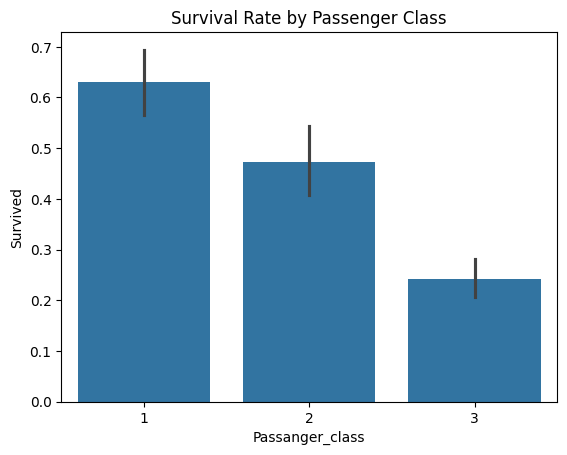

In [19]:
# Survival by Sex
sns.barplot(x='Sex', y='Survived', data=data)
plt.title('Survival Rate by Sex')
plt.show()

# Survival by Pclass
sns.barplot(x='Passanger_class', y='Survived', data=data)
plt.title('Survival Rate by Passenger Class')
plt.show()


In [22]:
test_results = X_test.copy()
test_results['actual'] = y_test.values
test_results['predicted'] = y_pred
test_results.to_csv("titanic_test_predictions.csv", index=False)


In [21]:
import pickle
with open('titanic_logreg_model.pkl', 'wb') as f:
    pickle.dump(model, f)


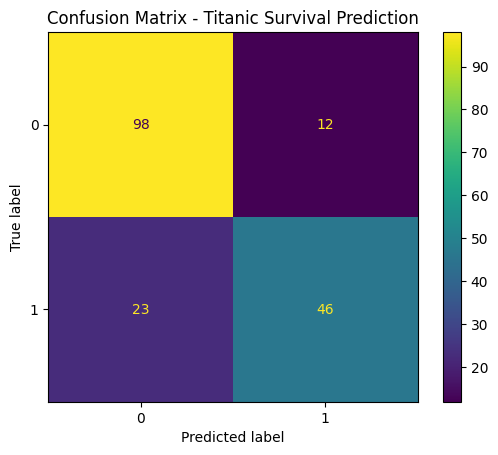

In [23]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.title("Confusion Matrix - Titanic Survival Prediction")
plt.show()


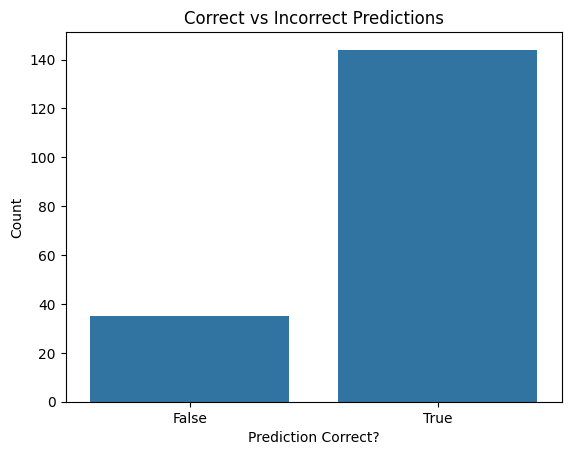

In [25]:
# Combine actual and predicted values
test_results = X_test.copy()
test_results['Actual'] = y_test.values
test_results['Predicted'] = y_pred

# Display first few rows
test_results.head(10)

sns.countplot(x=(test_results['Actual'] == test_results['Predicted']))
plt.title("Correct vs Incorrect Predictions")
plt.xlabel("Prediction Correct?")
plt.ylabel("Count")
plt.show()
